<a href="https://colab.research.google.com/github/NaraAndrad3/Data_Science/blob/main/DataScience_EDX_pt01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
%matplotlib inline


In [ ]:
data_filename = '/content/drive/MyDrive/DS/advertising.csv'
df = pd.read_csv(data_filename)

In [ ]:
df.shape
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
df_new = df.iloc[0:7]
df_new

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8


Text(0.5, 1.0, 'TV Budget vs Sales')

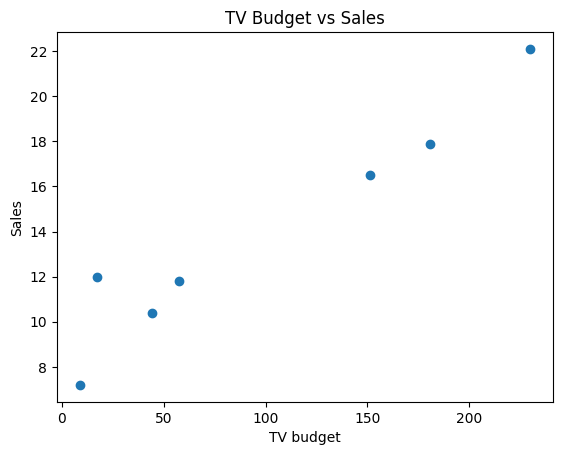

In [ ]:
plt.scatter(df_new[['TV']], df_new[['Sales']])
plt.xlabel('TV budget')
plt.ylabel('Sales')
plt.title('TV Budget vs Sales')

Text(0.5, 1.0, 'TV Budget vs Sales')

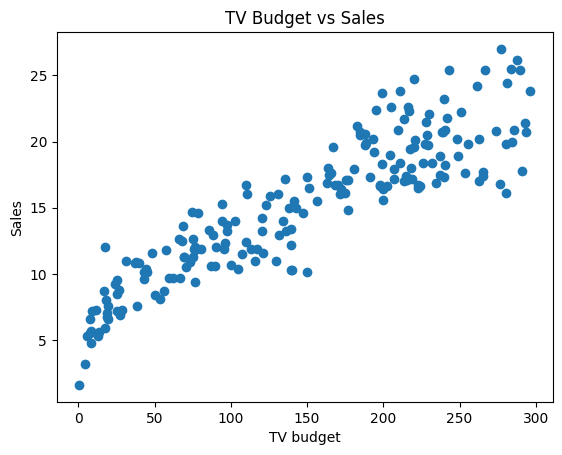

In [ ]:
plt.scatter(df[['TV']], df[['Sales']])
plt.xlabel('TV budget')
plt.ylabel('Sales')
plt.title('TV Budget vs Sales')

# Simple KNN Regression

In [ ]:
X_true = df.TV.iloc[5:13]
y_true = df.Sales.iloc[5:13]

# Sort the data to get indices ordered from lowest to highest TV values
idx = np.argsort(X_true).values

# Get the predictor data in the orden given by idx above
X_true = X_true.iloc[idx]

# Get the response data in order given by idx above
y_true = y_true.iloc[idx]

In [ ]:
"""
Define uma função que encontra o indice do vizinho mais próximo e retorna o valor do vix=zinho mais próximo
"""
def find_nearest(array, value):

  """
    Usa o .idxmin() pra encontrar o vizinho (a função de distancia é apenas o valor absoluto)
  """
  idx = pd.Series(np.abs(array - value)).idxmin()

  return idx, array[idx] # return the idx and the value of nearest neighbor


In [ ]:
# Create some synthetic x-values (might not be in the actual dataset)
# A funçõa linspace cria um conjuto de dados linearmente espaçados dentro dos limites estabalecidos

x = np.linspace(np.min(X_true), (np.max(X_true)))

y = np.zeros(len(x)) # arrayz preenchido com zeros do mesmo tamanho de x


In [ ]:
"""
  Busca em X_true o valor mais próximo de x (calculando a distância entre X-true e xi)
  quando encontra, a função find_nearest retorna o idx correspondente de X_true e o valor
  Como os elementos estão ordenados do menos para o maior, o idx retornado pela função é usado para indexar y a partir de y_true
  ou seja, o idx correspondente àquele valor em y_true é atribuido a y
"""
for i, xi in enumerate(x):

  y[i] = y_true[find_nearest(X_true, xi)[0]]



Text(0, 0.5, 'sales in $1000')

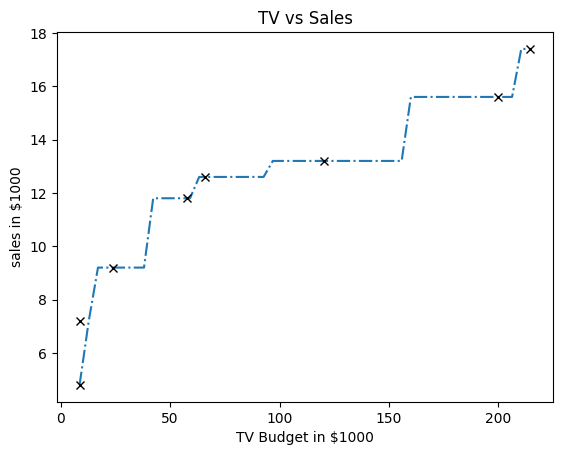

In [ ]:
plt.plot(x,y,'-.')

plt.plot(X_true, y_true, 'kx')

plt.title('TV vs Sales')
plt.xlabel('TV Budget in $1000')
plt.ylabel('sales in $1000')

# Part 2: KNN for k >= 1 using Sklearn


In [ ]:
X = df[['TV']].values # Predictor values
y = df[['Sales']].values # response values


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.6, random_state = 42) #--> 60% to training and 40% to test

In [ ]:
k_value_min = 1 # define the min value to k
k_value_max = 70 # define  the max value to k

k_list = np.linspace(k_value_min, k_value_max, 70)


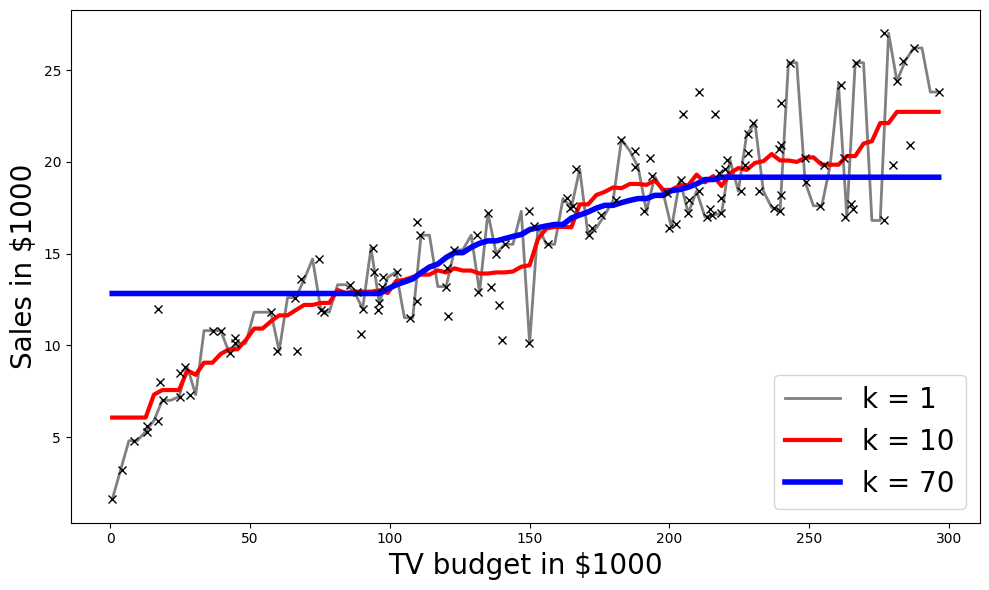

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))

j = 0

for k_value in k_list:
  # --> create the KNN Regression model
  model = KNeighborsRegressor(n_neighbors = int(k_value))

  model.fit(X_train, y_train) # Fitting the model on the training data (ajusta o modelo aos dados de treinamento)

  y_pred = model.predict(X_test) # Use the trained model to predict on the test data

  colors = ['grey', 'r', 'b']

  if k_value in [1,10,70]:
    xvals = np.linspace(X.min(), X.max(),100).reshape(-1,1)
    ypreds = model.predict(xvals)
    ax.plot(xvals, ypreds, '-', label = f'k = {int(k_value)}', linewidth = j+2,c = colors[j])
    j += 1

ax.legend(loc = 'lower right', fontsize = 20)
ax.plot(X_train,y_train,'x',label = 'train',color = 'k')
ax.set_xlabel('TV budget in $1000', fontsize = 20)
ax.set_ylabel('Sales in $1000', fontsize = 20)
plt.tight_layout()


# Exercise: Finding the Best k in KNN Regression

In [ ]:
x = df[['TV']].values
y = df['Sales'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y,train_size = 0.6, random_state=66)

In [ ]:
k_value_min= 1
k_value_max = 70

k_list = np.linspace(k_value_min, k_value_max,num = 70,dtype = int)

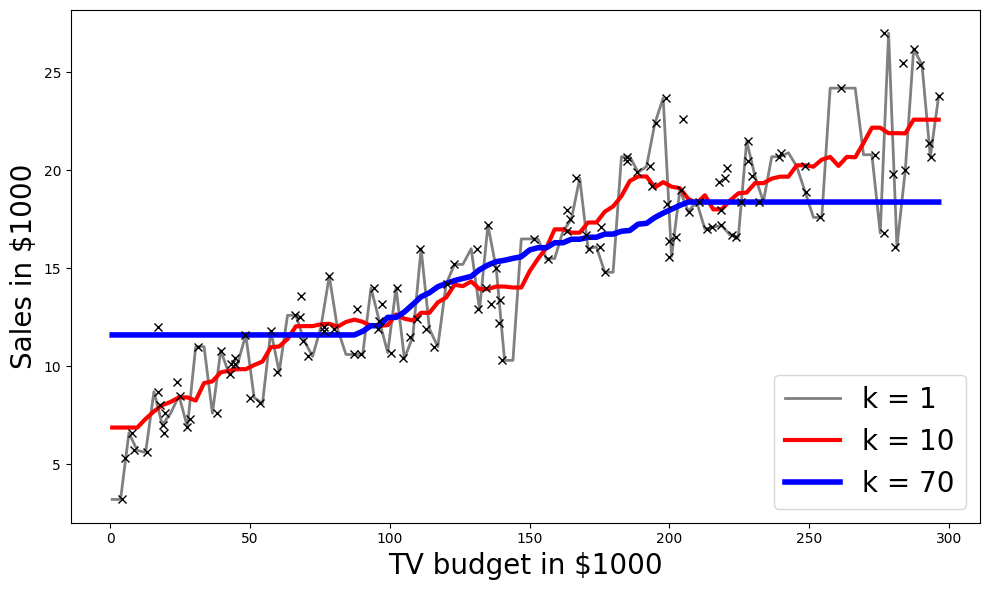

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))

knn_dic= {}

j = 0

for k_value in k_list:
  model = KNeighborsRegressor(n_neighbors=int(k_value))
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)


  MSE = mean_squared_error(y_test, y_pred)

  knn_dic[k_value] = MSE

  colors = ['grey', 'r', 'b']
  if k_value in [1,10,70]:
    xvals = np.linspace(x.min(), x.max(),100).reshape(-1,1)
    ypreds = model.predict(xvals)
    ax.plot(xvals, ypreds, '-', label = f'k = {int(k_value)}', linewidth = j+2,c = colors[j])
    j += 1

ax.legend(loc = 'lower right', fontsize = 20)
ax.plot(X_train,y_train,'x',label = 'train',color = 'k')
ax.set_xlabel('TV budget in $1000', fontsize = 20)
ax.set_ylabel('Sales in $1000', fontsize = 20)
plt.tight_layout()

## Graph the plot

Text(0, 0.5, 'MSE')

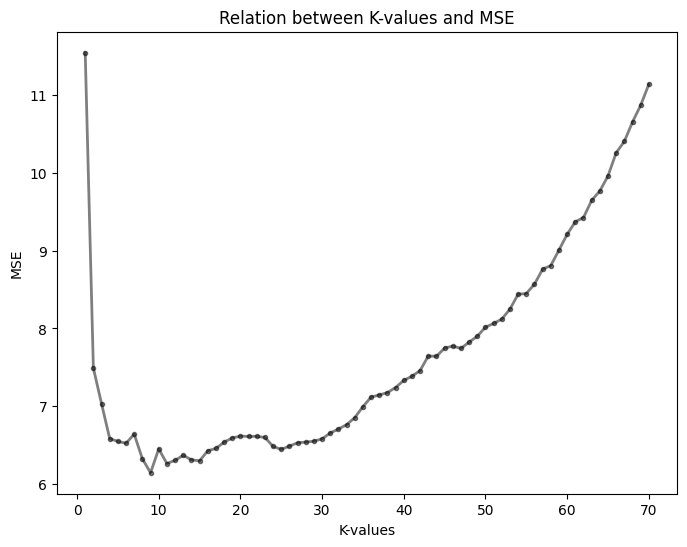

In [ ]:
"""
  Plot a graph wich depicts the relation between k values and MSE
"""
plt.figure(figsize=(8,6))
# --> list(knn_dic.keys()) --> transforma as chaves do dicionário em uma lista (bem como os valores (.values())) para que óssam ser plotados
plt.plot(knn_dic.keys(),knn_dic.values(), 'k.-',alpha=0.5,linewidth=2)

plt.title('Relation between K-values and MSE')
plt.xlabel('K-values')
plt.ylabel('MSE')